# 提升树实践作业

## 利用breast_cancer数据集构建GBDT及XGBoost分类模型，预测是否得癌症，并与其他分类模型做比较，说明其预测的效果

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.datasets import load_breast_cancer 
breast_cancer= load_breast_cancer()

In [3]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [4]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

In [14]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=1)

### XGBoost

In [3]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score

In [8]:
model = XGBClassifier(learning_rate=0.01)
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred = model.predict(test_X)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [10]:
from sklearn import metrics
# ROC曲线下与坐标轴围成的面积
print ('AUC: %.4f' % metrics.roc_auc_score(test_y ,y_pred))
# 准确率
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y ,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y ,y_pred))
# 精确率和召回率的调和平均数
print ('F1-score: %.4f' %metrics.f1_score(test_y ,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(test_y ,y_pred))

AUC: 0.9341
Accuracy: 0.9441
Recall: 0.8909
F1-score: 0.9245
Precesion: 0.9608


### GBDT

#### adaboost模型

In [16]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [17]:
predictions = classifier.predict(test_X)

In [18]:
confusion_matrix(test_y, predictions)

array([[86,  2],
       [ 3, 52]], dtype=int64)

In [21]:
# 深度=1的CART树做为adaboost的基分类器
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = np.arange(1,101,10)
accs_train = []
accs_test = []

for n_estimator in n_estimators:
    adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= 0.5, random_state=0)
    adaB.fit(train_X, train_y)

    y_train_pred = adaB.predict(train_X)
    acc_train = metrics.accuracy_score(train_y, y_train_pred)
    accs_train.append(acc_train)
    
    y_test_pred = adaB.predict(test_X)
    acc_test = metrics.accuracy_score(test_y, y_test_pred)
    accs_test.append(acc_test)

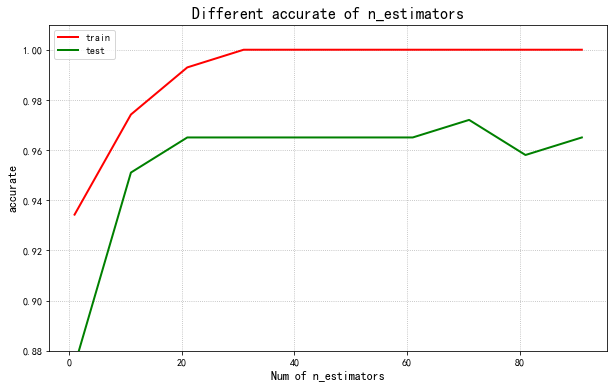

In [22]:
#画图
plt.figure(figsize=(10,6))
plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
plt.ylim(0.88,1.01)
plt.xlabel('Num of n_estimators',fontsize = 12)
plt.ylabel('accurate',fontsize =12)
plt.grid(b = True,ls= ':')
plt.title('Different accurate of n_estimators',fontsize = 16)
plt.legend(loc = 'best')
plt.show()

In [23]:
# learning_rate对模型效果的影响
base_estimator = DecisionTreeClassifier(max_depth=1)
learning_rates = [0.05, 0.1, 0.5, 0.9]
n_estimators = np.arange(1,41,1)

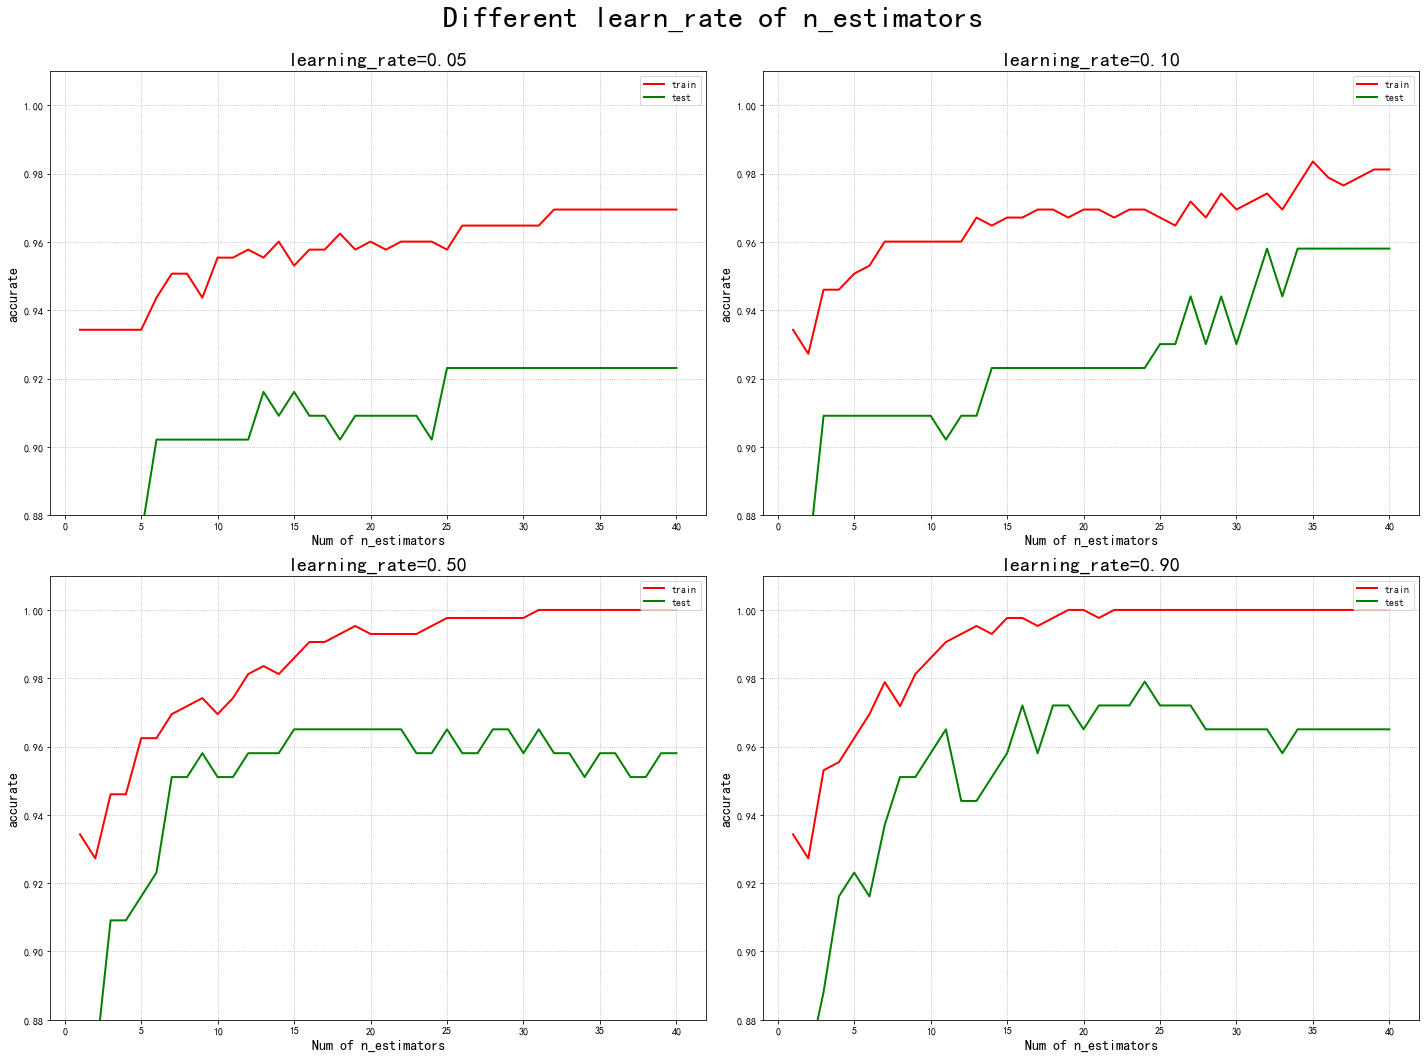

In [26]:
plt.figure(figsize=(20,15), facecolor='w')
for i, learning_rate in enumerate(learning_rates):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= base_estimator,n_estimators=n_estimator, learning_rate= learning_rate, random_state=0)
        adaB.fit(train_X, train_y)

        y_train_pred = adaB.predict(train_X)
        acc_train = metrics.accuracy_score(train_y, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(test_X)
        acc_test = metrics.accuracy_score(test_y, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(2, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('learning_rate=%.2f'%learning_rate, fontsize = 20)
    plt.legend(loc = 'best')
    
plt.suptitle('Different learn_rate of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.show()

#### 决策树

In [11]:
max_depths = [1, 5]
n_estimators = np.arange(1,41,1)

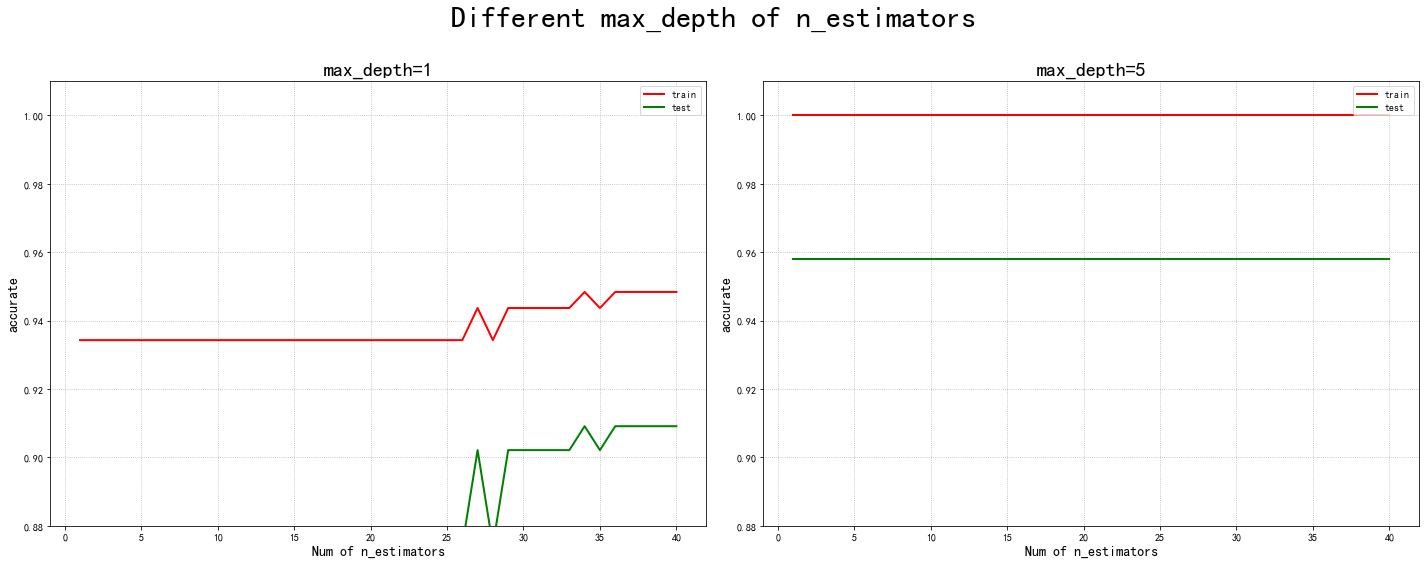

In [27]:
plt.figure(figsize=(20,8), facecolor='w')
for i, max_depth in enumerate(max_depths):
    accs_train = []
    accs_test = []
    for n_estimator in n_estimators:
        adaB = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=max_depth) ,
                                  n_estimators=n_estimator, learning_rate= 0.01, random_state=0)
        adaB.fit(train_X, train_y)

        y_train_pred = adaB.predict(train_X)
        acc_train = metrics.accuracy_score(train_y, y_train_pred)
        accs_train.append(acc_train)

        y_test_pred = adaB.predict(test_X)
        acc_test = metrics.accuracy_score(test_y, y_test_pred)
        accs_test.append(acc_test)
    
    plt.subplot(1, 2, i+1)
    plt.plot(n_estimators, accs_train, 'r-',lw=2, label='train')
    plt.plot(n_estimators, accs_test, 'g-',lw=2, label='test')
    plt.ylim(0.88,1.01)
    plt.xlabel('Num of n_estimators',fontsize = 14)
    plt.ylabel('accurate',fontsize =14)
    plt.grid(b = True,ls= ':')
    plt.title('max_depth=%s'%max_depth, fontsize = 20)
    plt.legend(loc = 'best')

plt.suptitle('Different max_depth of n_estimators', fontsize=30)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.85)
plt.show()

#### 逻辑回归 

In [28]:
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [30]:
#进行标准化
std = StandardScaler()
x_train1 = std.fit_transform(train_X)
x_test1 = std.transform(test_X)

In [32]:
#逻辑回归预测
lg = LogisticRegression(penalty='l2',C=1.0)
lg.fit(x_train1,train_y)
y_predict = lg.predict(x_test1)
print("计算的回归系数为：",lg.coef_)

计算的回归系数为： [[ 0.48143978  0.41014209  0.46725987  0.51392775  0.09769918 -0.3020924
   0.72884664  0.7890253   0.01424461 -0.39299676  1.08415325  0.04728618
   0.5669909   0.74499028  0.22229903 -0.90896096  0.05386185  0.49962018
  -0.17826258 -0.71184481  1.05809159  0.95888641  0.91097127  0.97646535
   0.41365059  0.01729729  0.82465772  0.93295021  0.76852329  0.61983664]]


In [34]:
print("准确率为：",lg.score(x_test1,test_y))

准确率为： 0.9790209790209791


#### 线性回归

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False).fit(train_X, train_y)
print('系数矩阵是：\n',reg.coef_)
print('截距项是：\n',reg.intercept_)
print('R方为：\n',reg.score(train_X, train_y))

系数矩阵是：
 [-3.87307591e-01  1.40573130e-03  4.12865188e-02  5.67852446e-04
  1.30738297e+00 -3.56329619e+00  1.42781771e+00  3.25282822e-01
  1.04801523e-01 -3.27280175e+00  4.81873620e-02  3.87195389e-03
 -2.01794484e-02  4.71034776e-04  1.89549043e+01 -7.88391212e-01
 -3.14446177e+00  9.27211628e+00  6.90453674e+00 -6.63568853e+00
  2.49242210e-01  7.92592801e-03 -5.00976600e-03 -1.12118034e-03
 -8.99875977e-01 -5.79343378e-02  3.11102441e-01  1.57373754e+00
  2.22197767e-01  5.34324929e+00]
截距项是：
 -1.66395332342083
R方为：
 0.7826211754776593


In [39]:
predicted=reg.predict(test_X)
print(predicted)
print(test_y)
print('测试数据R方为：\n',reg.score(test_X,test_y))

[ 0.27472312  0.81715848  0.30729213  0.58270371  0.54747223  0.57268512
  0.82491175  0.33793633  0.36157858  0.26737497  0.05307414  1.04514117
  0.66551195 -0.00472281  0.40125834  0.09393091 -0.01667875  0.19747962
 -0.03676205  0.74327034  0.06767149  0.09413221  0.79245424  0.12436616
  0.62788317  0.32347781  0.10554202  1.02767006  1.27909001  0.55738778
  1.15713025  0.08743866  1.02620139  0.76313303  0.03899625  0.08233877
  0.66809906  0.21776443  0.41648344  0.15281293  0.12816355  0.34938968
  0.17708692  0.06388173  0.09720105  0.84059258 -0.21188453  0.03844708
  0.21615714  0.47128254  0.76893909  1.08019562  0.25209339 -0.04911938
  0.07079574  0.04339813  0.08671089  0.54095375  0.1911264   0.00960331
 -0.06447873  1.16732436  0.3056373   0.30455367  0.10732932  0.1692464
 -0.02917999  0.90554688 -0.09525739  0.03852711 -0.05528351  0.06282552
  0.36161747  0.98851928 -0.11959873  0.98509611 -0.06573218  0.37951768
 -0.07152805  0.95913301  0.10121263  0.9098664  -0.

#### SVM

In [40]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(train_X, train_y)
svm_y = lsvc.predict(test_X)

E:\Anaconda3\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
from sklearn.metrics import classification_report
print ('Accuracy of the SVM: ' , lsvc.score(test_X,test_y))

Accuracy of the SVM:  0.9370629370629371


In [42]:
print (classification_report(test_y, svm_y, target_names = ['Benign', 'Malignant'])) 

              precision    recall  f1-score   support

      Benign       0.92      0.98      0.95        88
   Malignant       0.96      0.87      0.91        55

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### 模型对比

通过对breast_cancer数据集分别构建XGBoost,adaboost模型，决策树，逻辑回归，线性回归和SVM模型，我们发现逻辑回归模型的预测准确率最高，为0.97，故用于后续模型预测。

## 加载diabetes数据集，构建一年以后病情进展指标y的GBDT及XGBoost回归模型，并与其他回归模型做比较，说明其预测效果。

In [43]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [44]:
X=diabetes.data
y=diabetes.target

In [72]:
train_x3, test_x3, train_y3, test_y3 = train_test_split(X,y, test_size=0.2, random_state=7)
print(len(train_x3))

353


### XGBoost

In [73]:
model2 = XGBClassifier(learning_rate=0.01)
model2.fit(train_x3, train_y3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred2 = model2.predict(test_x3)
y_pred2

array([ 71., 144., 101.,  84., 200., 178.,  90.,  90.,  90., 104.,  71.,
        49., 142., 142.,  71.,  84.,  84., 220.,  72.,  85., 275., 178.,
       275.,  91., 178., 142., 275., 200.,  71., 144., 275., 220., 275.,
        55., 248., 200., 128.,  72., 275., 144.,  71.,  91., 200., 275.,
       248.,  55.,  71., 178.,  90.,  71.,  77., 182.,  71., 178.,  72.,
       142., 144.,  72.,  90.,  90.,  72., 185.,  90., 101., 200., 178.,
        90.,  96., 142.,  90., 200., 275.,  97.,  72., 265.,  88., 275.,
       144., 275., 275., 275., 104., 150.,  85.,  88., 101., 182., 101.,
        90.])

In [75]:
from sklearn import metrics
# 准确率
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y3 ,y_pred2))

Accuracy: 0.0112


### adaboost回归

In [76]:
#获取一个特征
diabetes_x_temp = diabetes.data[:, np.newaxis, 2] 

diabetes_x_train = diabetes_x_temp[:-20]   #训练样本
diabetes_x_test = diabetes_x_temp[-20:]    #测试样本 后20行
diabetes_y_train = diabetes.target[:-20]   #训练标记
diabetes_y_test = diabetes.target[-20:]    #预测对比标记

In [82]:
# 训练模型
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(diabetes_x_train, diabetes_y_train)
regr_2.fit(diabetes_x_train, diabetes_y_train)

# 预测
y_1 = regr_1.predict(diabetes_x_test)
y_2 = regr_2.predict(diabetes_x_test)

In [83]:
regr_1.score(diabetes_x_test, diabetes_y_test)

0.45560494111815064

In [84]:
regr_2.score(diabetes_x_test, diabetes_y_test)

0.3634742253365283

### 线性回归

In [86]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()   #创建线性回归

In [87]:
linreg.fit(train_x3, train_y3)
linreg.coef_

array([ -38.30129181, -250.45660543,  606.78164731,  372.0652256 ,
        892.67319909, -930.78258355, -573.97183049,  160.28097125])

In [88]:
# 计算预测结果
pred_y3 = linreg.predict(test_x3)
pred_y3 

array([ 97.0863291 , 140.41464033, 122.31641748, 211.40614491,
       203.16160813, 167.16949748,  64.64077965, 100.33903041,
        69.19721409, 161.99443411, 132.56582137, 205.3422786 ,
       197.09341255, 203.04719038, 144.67348085, 143.26647913,
       132.57266104, 198.38416336,  54.02580162, 150.89587761,
       242.68537193, 128.58886993, 228.56706932, 202.15506734,
       165.8538783 , 197.30149679, 252.05800318, 125.65417702,
       183.85042667, 142.99900481, 210.82597203, 197.05254743,
       190.96839326, 161.85635343, 169.09865593, 166.02942881,
       104.91050284,  64.87960193, 255.86547083, 222.30869233,
       112.55928212, 158.24261773, 137.51854985, 333.70336825,
       174.79261764, 137.38223688, 157.95786951, 172.16604633,
       104.17088003,  97.20143181,  93.55330514, 146.00571249,
       154.81342442, 154.78022083,  93.28476407, 136.23383111,
       150.67326545,  90.11298633, 133.10566709,  84.0760672 ,
        84.04311182, 133.904267  , 118.42222495,  94.59

In [89]:
# 计算均方误差(损失值)
print(mean_squared_error(test_y3, pred_y3))

2982.0668691763217


In [90]:
linreg.score(train_x3, train_y3)  

0.5086338257855644

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


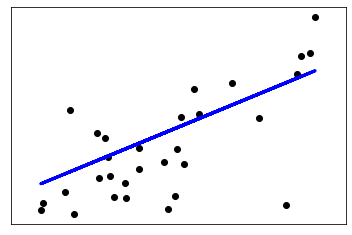

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" 
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'black')
plt.plot(diabetes_X_test, diabetes_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

### 模型对比

通过对糖尿病的数据集建立XGBoost,线性回归模型和adaboost模型，我们发现线性回归的预准确率最高。

## 选择breast_cancer或diabetes数据集其一，三人一组，完成一份完整的分析报告

## 选做题 构建模型，提升表情识别数据的准确性

In [4]:
df=pd.read_csv("F:/大三（上）/机器学习/决策树参考代码/决策树参考代码/fer2013.csv")
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
pixels = df.loc[:,'pixels'].values

print(pixels.shape)
print(type(pixels))

(35887,)
<class 'numpy.ndarray'>


In [6]:
px = []
for x in pixels : 
    x = x.split(" ")
    x = [float(t) for t in x]
    px.append(x)

In [7]:
x = np.array(px)
print(x.shape)

(35887, 2304)


In [8]:
y = df.loc[:, 'emotion'].values
print(y.shape)
print(type(y))

(35887,)
<class 'numpy.ndarray'>


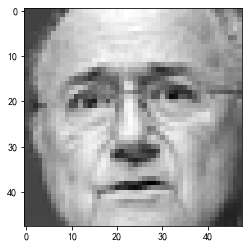

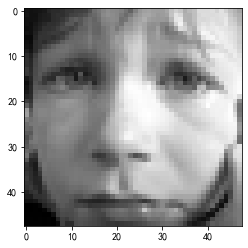

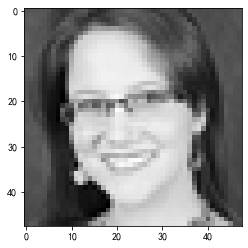

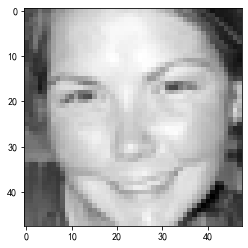

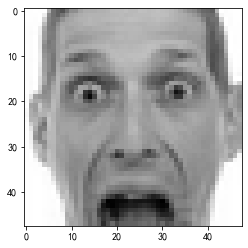

In [9]:
for ix in range(5,10):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((48, 48)), interpolation='none', cmap='gray')
    plt.show()

In [10]:
#可以将其全部转换为图片，图片名字的形式为图片编号_表情类别
for ix in range(35887): 
    img=x[ix].reshape((48, 48))
    plt.imsave('F:/大三（上）/机器学习/决策树实践作业/决策树实践作业/表情图/'+str(ix)+"_"+str(y[ix])+".jpg",img, cmap="gray")

In [11]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [15]:
clf=tree.DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain, Ytrain)

In [16]:
score_ = clf.score(Xtest, Ytest)
score_ 

0.3124361474876939

In [17]:
score = cross_val_score(clf,x,y,cv=10).mean()#使用交叉验证
score

0.3237943853587063

### 数据增强

####  方法1

In [18]:
clf1=XGBClassifier(learning_rate=0.01)
clf1=clf1.fit(Xtrain, Ytrain)

In [19]:
score_1 = clf1.score(Xtest, Ytest)
score_1

0.3998328225132349

#### 方法2

In [105]:
import tensorflow as tf
from tensorflow.keras import datasets, Sequential, layers,metrics
from keras.layers import Dense, Flatten, Input
from keras.layers import BatchNormalization, Conv2D,MaxPooling2D
from keras import Model

In [109]:
label = np.array(df['emotion'])
img_data = np.array(df['pixels'])
N_sample = label.size
print(N_sample)

35887


In [110]:
Face_data = np.zeros((N_sample, 48 * 48))
Face_label = np.zeros((N_sample, 7), dtype=int)
temp = np.zeros((7), dtype= int)
for i in range(N_sample):
    x = img_data[i]
    x = np.fromstring(x, dtype=float, sep=' ')
    x_max = x.max()
    x = x / (x_max + 0.0001)
 
    Face_data[i] = x
    Face_label[i, int(label[i])] = 1
    if i <10:
        print('i: %d \t '%(i), Face_label[i])

i: 0 	  [1 0 0 0 0 0 0]
i: 1 	  [1 0 0 0 0 0 0]
i: 2 	  [0 0 1 0 0 0 0]
i: 3 	  [0 0 0 0 1 0 0]
i: 4 	  [0 0 0 0 0 0 1]
i: 5 	  [0 0 1 0 0 0 0]
i: 6 	  [0 0 0 0 1 0 0]
i: 7 	  [0 0 0 1 0 0 0]
i: 8 	  [0 0 0 1 0 0 0]
i: 9 	  [0 0 1 0 0 0 0]


In [111]:
train_num = 30000
test_num = 5000
train_x = Face_data[0:train_num, :]
train_y = Face_label[0:train_num, :]
test_x = Face_data[train_num: train_num + test_num, :]
test_y = Face_label[train_num: train_num + test_num, :]
print("All is well")
batch_size = 50
train_batch_num = train_num / batch_size
test_batch_num = test_num / batch_size
train_epoch = 100
learning_rate = 0.001

All is well


In [114]:
# Network Parameters
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
n_input = 2304  # data input (img shape: 48*48)
n_classes = 7  # total classes
dropout = 0.5  # Dropout, probability to keep units
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)  # dropout (keep probability)

Instructions for updating:
non-resource variables are not supported in the long term


In [115]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [116]:
def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')

In [117]:
# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 48, 48, 1])
    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)
    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    # Convolution Layer
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling)
    conv3 = maxpool2d(conv3, k=2)
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [118]:
# Store layers weight & bias
weights = {
    # 3x3 conv, 1 input, 128 outputs
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 128])),
    # 3x3 conv, 128 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([3, 3, 128, 64])),
    # 3x3 conv, 64 inputs, 32 outputs
    'wc3': tf.Variable(tf.random_normal([3, 3, 64, 32])),
    # fully connected,
    'wd1': tf.Variable(tf.random_normal([6 * 6 * 32, 200])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([200, n_classes]))
}

In [119]:
biases = {
    'bc1': tf.Variable(tf.random_normal([128])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bc3': tf.Variable(tf.random_normal([32])),
    'bd1': tf.Variable(tf.random_normal([200])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [120]:
# Construct model
pred = conv_net(x, weights, biases, keep_prob)
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [121]:
# Initializing the variables
init = tf.initialize_all_variables()
Train_ind = np.arange(train_num)
Test_ind = np.arange(test_num)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(0, train_epoch):
        Total_test_loss = 0
        Total_test_acc = 0
        for train_batch in range(0, int(train_batch_num)):
            sample_ind = Train_ind[train_batch * batch_size:(train_batch + 1) * batch_size]
            batch_x = train_x[sample_ind, :]
            batch_y = train_y[sample_ind, :]
            # Run optimization op (backprop)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                           keep_prob: dropout})
            if train_batch % batch_size == 0:
                # Calculate loss and accuracy
                loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                                  y: batch_y,
                                                                  keep_prob: 1.})
                print("Epoch: " + str(epoch + 1) + ", Batch: " + str(train_batch) + ", Loss= " + \
                      "{:.3f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))
        # Calculate test loss and test accuracy
        for test_batch in range(0, int(test_batch_num)):
            sample_ind = Test_ind[test_batch * batch_size:(test_batch + 1) * batch_size]
            batch_x = test_x[sample_ind, :]
            batch_y = test_y[sample_ind, :]
            test_loss, test_acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                                        y: batch_y,
                                                                        keep_prob: 1.})
            Total_test_lost = Total_test_loss + test_loss
            Total_test_acc = Total_test_acc + test_acc
 
        Total_test_acc = Total_test_acc / test_batch_num
        Total_test_loss = Total_test_lost / test_batch_num
        print("Epoch: " + str(epoch + 1) + ", Test Loss= " + \
              "{:.3f}".format(Total_test_loss) + ", Test Accuracy= " + \
              "{:.3f}".format(Total_test_acc))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 1, Batch: 0, Loss= 195016.906, Training Accuracy= 0.200
Epoch: 1, Batch: 50, Loss= 23754.133, Training Accuracy= 0.100
Epoch: 1, Batch: 100, Loss= 8702.891, Training Accuracy= 0.240
Epoch: 1, Batch: 150, Loss= 9340.756, Training Accuracy= 0.160
Epoch: 1, Batch: 200, Loss= 6577.802, Training Accuracy= 0.240
Epoch: 1, Batch: 250, Loss= 4031.714, Training Accuracy= 0.220
Epoch: 1, Batch: 300, Loss= 3692.923, Training Accuracy= 0.240
Epoch: 1, Batch: 350, Loss= 3531.551, Training Accuracy= 0.120
Epoch: 1, Batch: 400, Loss= 2430.544, Training Accuracy= 0.200
Epoch: 1, Batch: 450, Loss= 1878.775, Training Accuracy= 0.240
Epoch: 1, Batch: 500, Loss= 2219.162, Training Accuracy= 0.160
Epoch: 1, Batch: 550, Loss= 972.942, Training Accuracy= 0.220
Epoch: 1, Test Loss= 6.533, Test Accuracy= 0.167
Epoch: 2, Batch: 0, Loss= 562.549, Training Accuracy= 0.140
Epoch: 2, Batch: 50, Loss= 318.493, Training Accuracy= 0.200
E

Epoch: 11, Batch: 150, Loss= 1.801, Training Accuracy= 0.260
Epoch: 11, Batch: 200, Loss= 1.878, Training Accuracy= 0.180
Epoch: 11, Batch: 250, Loss= 1.811, Training Accuracy= 0.220
Epoch: 11, Batch: 300, Loss= 1.928, Training Accuracy= 0.160
Epoch: 11, Batch: 350, Loss= 1.811, Training Accuracy= 0.300
Epoch: 11, Batch: 400, Loss= 1.801, Training Accuracy= 0.300
Epoch: 11, Batch: 450, Loss= 1.777, Training Accuracy= 0.280
Epoch: 11, Batch: 500, Loss= 1.756, Training Accuracy= 0.280
Epoch: 11, Batch: 550, Loss= 1.739, Training Accuracy= 0.280
Epoch: 11, Test Loss= 0.018, Test Accuracy= 0.256
Epoch: 12, Batch: 0, Loss= 1.781, Training Accuracy= 0.240
Epoch: 12, Batch: 50, Loss= 1.773, Training Accuracy= 0.320
Epoch: 12, Batch: 100, Loss= 1.805, Training Accuracy= 0.220
Epoch: 12, Batch: 150, Loss= 1.802, Training Accuracy= 0.260
Epoch: 12, Batch: 200, Loss= 1.880, Training Accuracy= 0.180
Epoch: 12, Batch: 250, Loss= 1.810, Training Accuracy= 0.220
Epoch: 12, Batch: 300, Loss= 1.930, Tr

Epoch: 21, Batch: 500, Loss= 1.754, Training Accuracy= 0.280
Epoch: 21, Batch: 550, Loss= 1.737, Training Accuracy= 0.280
Epoch: 21, Test Loss= 0.018, Test Accuracy= 0.256
Epoch: 22, Batch: 0, Loss= 1.779, Training Accuracy= 0.240
Epoch: 22, Batch: 50, Loss= 1.774, Training Accuracy= 0.320
Epoch: 22, Batch: 100, Loss= 1.803, Training Accuracy= 0.220
Epoch: 22, Batch: 150, Loss= 1.802, Training Accuracy= 0.260
Epoch: 22, Batch: 200, Loss= 1.882, Training Accuracy= 0.180
Epoch: 22, Batch: 250, Loss= 1.808, Training Accuracy= 0.220
Epoch: 22, Batch: 300, Loss= 1.932, Training Accuracy= 0.160
Epoch: 22, Batch: 350, Loss= 1.811, Training Accuracy= 0.300
Epoch: 22, Batch: 400, Loss= 1.801, Training Accuracy= 0.300
Epoch: 22, Batch: 450, Loss= 1.775, Training Accuracy= 0.280
Epoch: 22, Batch: 500, Loss= 1.754, Training Accuracy= 0.280
Epoch: 22, Batch: 550, Loss= 1.737, Training Accuracy= 0.280
Epoch: 22, Test Loss= 0.018, Test Accuracy= 0.256
Epoch: 23, Batch: 0, Loss= 1.779, Training Accura

KeyboardInterrupt: 